In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
import seaborn as sns


# 1. Definition of the Problem

- This problem involves predicting temperature (Temp_C) using weather data.
- The feature variables include all columns except for date/time, which will be used to predict the target variable.
- By constructing regression models, our goal is to predict temperature based on given weather features.
- This is a typical supervised learning problem, as the model uses labeled data during training and attempts to predict a continuous numerical target (temperature).
- The importance of the task lies in accurately predicting future temperatures based on past meteorological data, which is crucial for fields such as agriculture, entertainment, and construction.

# 2. Data Collection and Preprocessing

The data was collected from a weather dataset stored in a CSV file named 'weather_dataset.csv'. 

### These data may be collected in various ways:

- Meteorological station observation: 

Data may be collected from meteorological stations or observation stations. These sites are usually located at different geographic locations, regularly recording various meteorological variables such as temperature, humidity, wind speed, air pressure, etc.

- Satellite and remote sensing technology: 

Some data may be collected through satellite and remote sensing technology, which can observe meteorological changes from a wide range of surfaces.

- Data sharing platforms: 

Public institutions or private organizations may share meteorological data on public databases or platforms for use by researchers, developers, and other stakeholders.

## Handling Missing Values and check the dataset

1. Missing values: There is no missing value in every column, so we do not need to handle missing values.
2. The weather dataset is clean.

In [3]:
# load dataset
weather_data = pd.read_csv('weather_dataset.csv')

# Check for missing values
missing_values = weather_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [4]:
# head Data of the dataframe
print(weather_data.head())

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


In [5]:
# The last five rows of the data set
print(weather_data.tail())

             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Visibility_km  Press_kPa Weather  
8779            9.7     100.13    Snow  
8780            9.7     100.03    Snow  
8781            4.8      99.95    Snow  
8782            9.7      99.91    Snow  
8783           11.3      99.89    Snow  


In [6]:
# The number of rows n columns in Dataset 
print(weather_data.shape)

(8784, 8)


In [7]:
# Basic information about the data set
print(weather_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
None


In [8]:
print(weather_data.dtypes)

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object


## Data Encoding and Date/Time Removal

- Data Encoding: Non-numeric feature 'Weather' is encoded using LabelEncoder to convert categorical data into numerical form so that the model can handle it.
- Date/Time Removal: The 'Date/Time' column is dropped from the dataset because models cannot directly handle string-type data.

In [9]:
# Encode non-numeric feature 'Weather'
# Some feature values cannot be converted to floating-point numbers. 
# This indicates the presence of non-numeric types of features in the data. 
# In such cases, non-numeric features need to be encoded so that the model can handle them.
label_encoder = LabelEncoder()
weather_data['Weather'] = label_encoder.fit_transform(weather_data['Weather'])

# Remove the 'Date/Time' column
# Models cannot directly handle string-type data. 
# One way to solve this problem is to remove or properly process the date/time column from the data before training the model.
weather_data.drop(columns=['Date/Time'], inplace=True)

# Define features (X) and target variable (y)
X = weather_data.drop(columns=['Temp_C'])  
y = weather_data['Temp_C']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)


# 3. Model/framework selection and Implementation

## Feature Analysis / Data Visualization

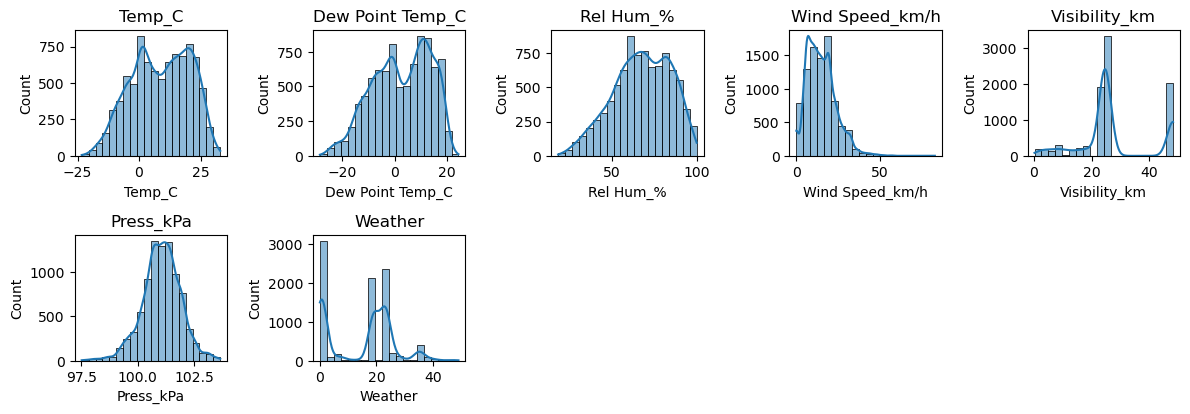

In [10]:
# Show plots to get a visual overview of the distribution of each feature 
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)

plt.figure(figsize=(12, 12)) 
for feature in weather_data.columns.to_list():
    plt.subplot(6, 5, weather_data.columns.to_list().index(feature) + 1) 
    sns.histplot(data=weather_data[feature], bins=20, kde=True) 
    plt.title(feature) 
plt.tight_layout() 
plt.show()


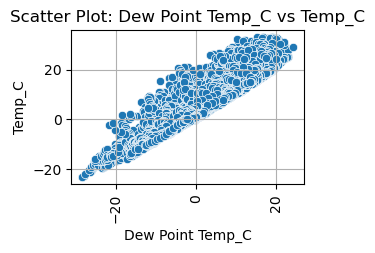

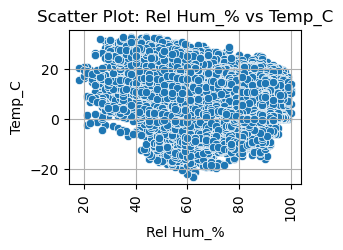

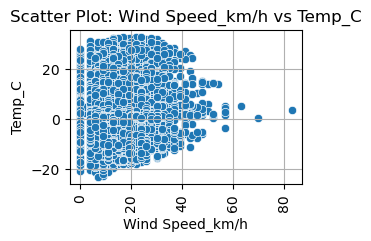

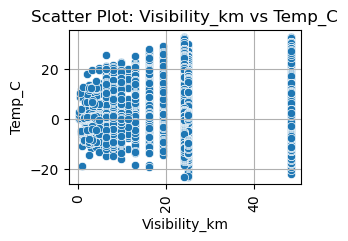

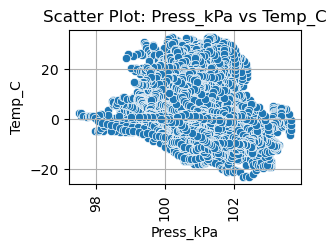

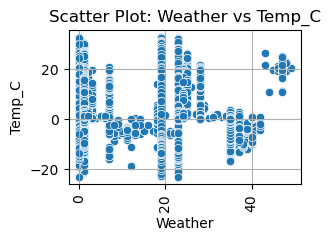

In [18]:
# Define features
features = X.columns.tolist()

# Loop through each feature
for feature in features:
  # Create a scatter plot
  plt.figure(figsize=(3, 2))
  sns.scatterplot(x=feature, y='Temp_C', data=weather_data)
  
  # Add labels and title
  plt.xlabel(feature)
  plt.ylabel('Temp_C')
  plt.title(f'Scatter Plot: {feature} vs Temp_C')
  
  # Rotate x-axis labels for better readability if necessary
  plt.xticks(rotation=90)
  
  # Show the plot
  plt.grid(True)
  plt.show()

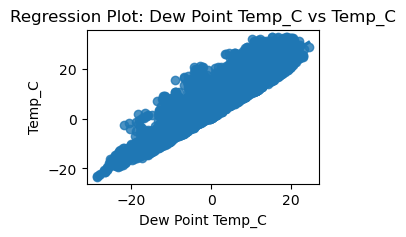

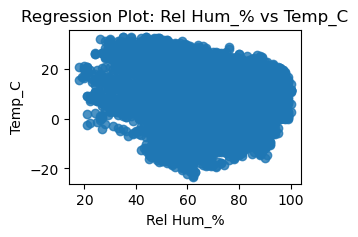

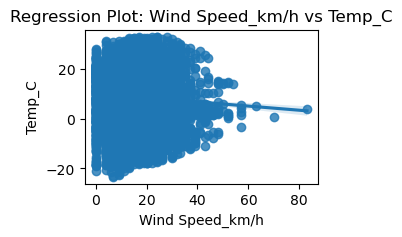

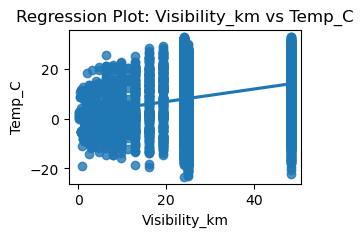

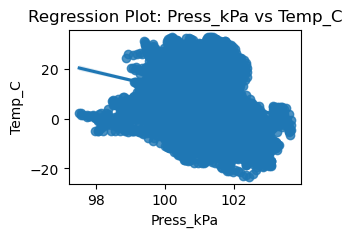

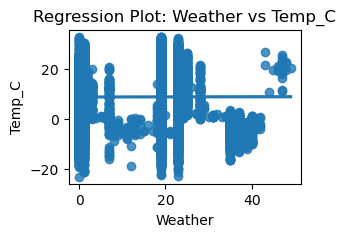

In [19]:
# Define features
features = X.columns.tolist()

# Loop through each feature
for feature in features:
    # Create a regression plot
    plt.figure(figsize=(3, 2))
    sns.regplot(x=feature, y='Temp_C', data=weather_data)
    
    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Temp_C')
    plt.title(f'Regression Plot: {feature} vs Temp_C')
    
    # Show the plot
    plt.show()


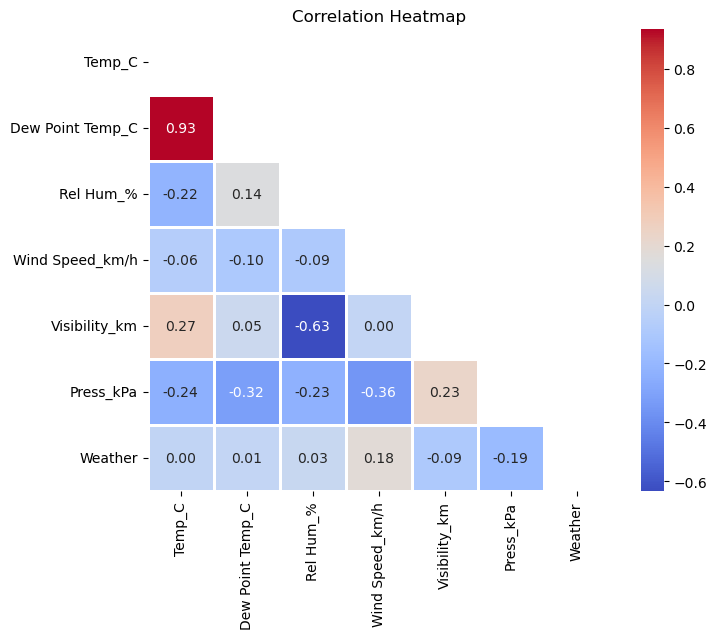

In [13]:
# Select numeric columns for correlation heatmap
numeric_cols = weather_data.select_dtypes(include=np.number).columns.tolist()

# Calculate correlation matrix
corr_matrix = weather_data[numeric_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Correlation Heatmap without diagonal redundancy
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, square=True, mask=mask)
plt.title('Correlation Heatmap')
plt.show()


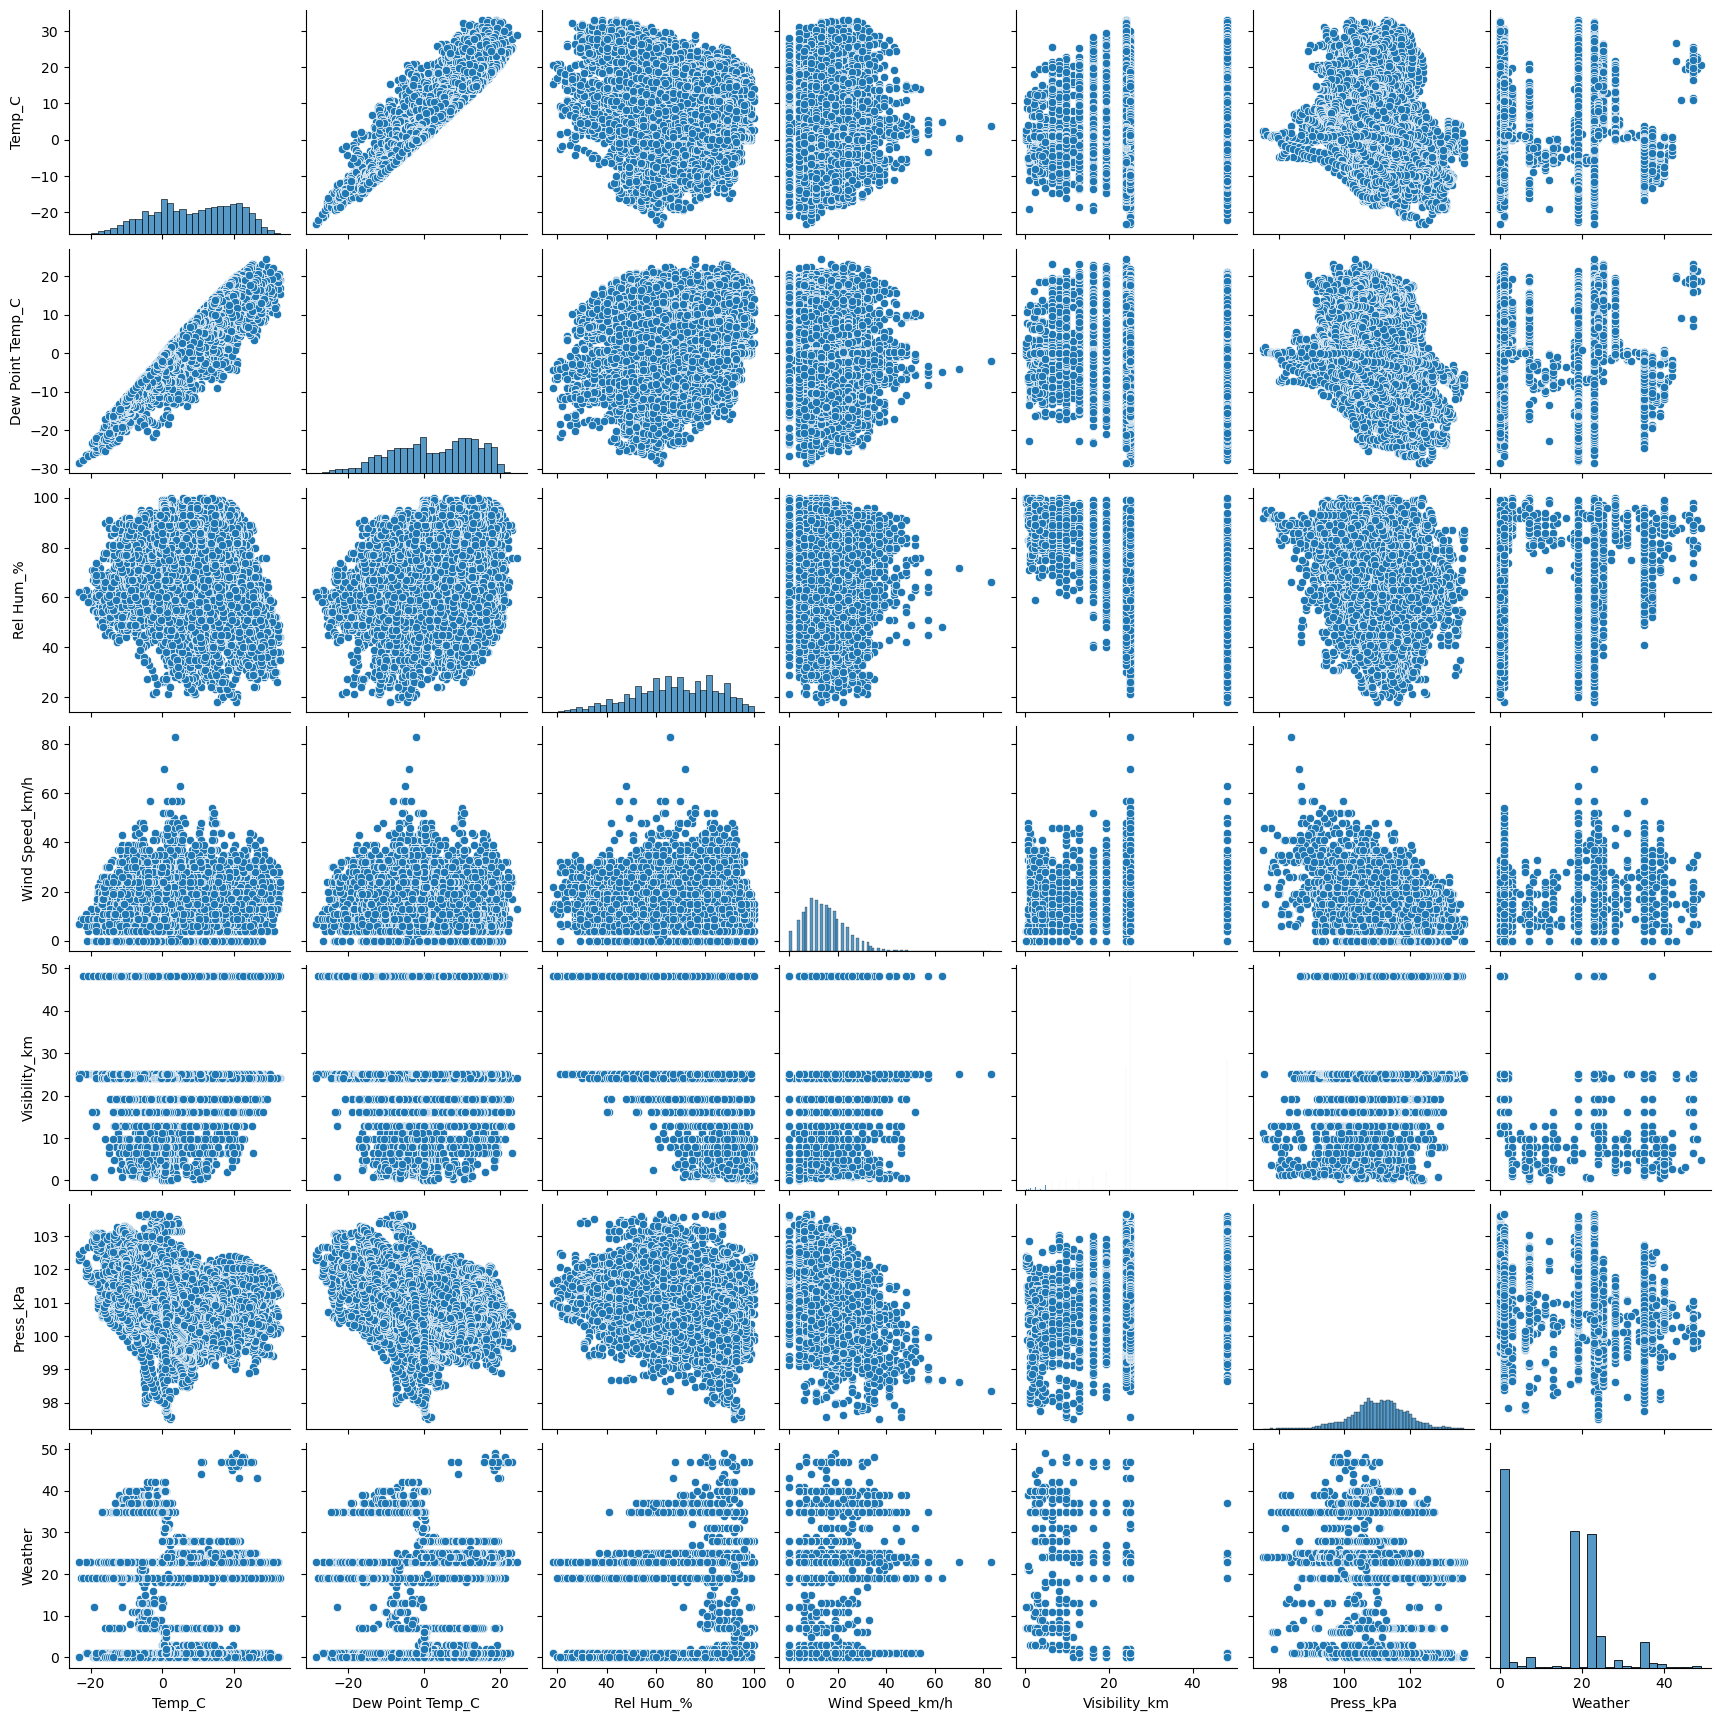

In [14]:
fig = sns.pairplot(weather_data)

## Feature Analysis / Analyze the Charts

Our dataset exhibits several characteristics:

1. The target variable Temp_C follows a normal distribution but has a dip in the middle, and the feature Dew Point Temp_C and Rel Hum_% also follows a normal distribution but has a dip in the middle.
2. Press_kPa follows a normal distribution. The other features do not follow a normal distribution.
3. There is a correlation of 0.93 between the target variable Temp_C and the feature Dew Point Temp_C, but Temp_C has low correlations with other features.

## Model/framework selection

- The provided code demonstrates the implementation of supervised learning algorithms for regression tasks. 
- Specifically, it includes the use of Lasso Regression and Random Forest Regression for predicting temperature based on weather data. 
- These supervised learning methods are suitable for regression tasks where the goal is to predict a continuous target variable (in this case, temperature) based on input features (weather data).

### BuidI Following Models and Evaluate.

1. Lasso regression: 
- Because the Lasso regression model can effectively handle highly correlated features. 
- Given the high correlation between the target variable Temp_C and the feature Dew Point Temp_C, using the Lasso regression model can help select the most representative features. 
- This can assist in reducing model overfitting and improving the model's generalization ability.

2. Random Forest Regression:
- Since the target variable Temp_C and the feature Dew Point Temp_C exhibit a normal distribution with a concave shape in the middle, this may indicate the presence of non-linear relationships. 
- The Random Forest regression model is able to naturally handle such non-linear relationships because it is composed of multiple decision trees, each capable of capturing complex patterns and non-linear relationships in the data.

#### Add a function:

In [236]:
# Add function to evaluate regression model performance on training and testing sets
def evaluate_performance(model, X_train, y_train, X_test, y_test):
    """
    Evaluate the performance of a model on training and testing sets.

    Parameters:
    model: Model to evaluate.
    X_train: Features of the training set.
    y_train: Target variable of the training set.
    X_test: Features of the testing set.
    y_test: Target variable of the testing set.

    Returns:
    performance_dict: Dictionary containing the performance metrics.
    """
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate R-squared for training and testing sets
    train_rsq = r2_score(y_train, y_train_pred)
    test_rsq = r2_score(y_test, y_test_pred)

    # Calculate RMSE for training and testing sets
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

    # Calculate MAE for training and testing sets
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Create a dictionary to store the performance metrics
    performance_dict = {
        'R-squared (Training Set)': train_rsq,
        'R-squared (Testing Set)': test_rsq,
        'RMSE (Training Set)': train_rmse,
        'RMSE (Testing Set)': test_rmse,
        'MAE (Training Set)': train_mae,
        'MAE (Testing Set)': test_mae
    }

    # Return performance metrics
    return performance_dict


### Lasso regression
Because the Lasso regression model can effectively handle highly correlated features. Given the high correlation between the target variable Temp_C and the feature Dew Point Temp_C, using the Lasso regression model can help select the most representative features. This can assist in reducing model overfitting and improving the model's generalization ability.

In [227]:
# Define the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
}

# Perform grid search
grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', refit=True)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found:", grid_search.best_params_)

# Get the best model from GridSearch
best_lasso_model = grid_search.best_estimator_

# Make predictions on the test set with the best model
y_pred = best_lasso_model.predict(X_test)

# Evaluate the performance of the best model
performance_str = evaluate_performance(best_lasso_model, X_train, y_train, X_test, y_test)
print(performance_str)


Best parameters found: {'alpha': 0.01}
{'R-squared (Training Set)': 0.995015865640286, 'R-squared (Testing Set)': 0.9956390015239742, 'RMSE (Training Set)': 0.8211644862220605, 'RMSE (Testing Set)': 0.7862700452347614, 'MAE (Training Set)': 0.6144738677024153, 'MAE (Testing Set)': 0.5938904118991307}


### Random Forest Regression

Since the target variable Temp_C and the feature Dew Point Temp_C exhibit a normal distribution with a concave shape in the middle, this may indicate the presence of non-linear relationships. The Random Forest regression model is able to naturally handle such non-linear relationships because it is composed of multiple decision trees, each capable of capturing complex patterns and non-linear relationships in the data.

In [228]:
# Add Randomized Search for hyperparameter tuning in Random Forest Regressor

# Initialize a Random Forest Regressor
rf = RandomForestRegressor()

# Define hyperparameter grid for Randomized Search CV
param_grid = {
    'n_estimators': [50, 100],   
    'max_depth': [10, 20], 
    'max_features': ['sqrt', 'log2'],
}

# Perform Randomized Search CV to find best hyperparameters
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_grid,
                                   n_iter=8, cv=5, 
                                   verbose=2, random_state=42, 
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

# Print the best parameters found by Randomized Search CV
print("Best parameters found:", random_search.best_params_)

# Assign the best model found to a variable
best_rf_model = random_search.best_estimator_

# Fit the model to the training data
# best_rf_model.fit(X_train, y_train, feature_names=X_train.columns)  

# Evaluate the performance of the random forest regressor
performance_str = evaluate_performance(best_rf_model, X_train, y_train, X_test, y_test)
print(performance_str)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found: {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 20}
{'R-squared (Training Set)': 0.9991794062196552, 'R-squared (Testing Set)': 0.9949904205421358, 'RMSE (Training Set)': 0.333195708029205, 'RMSE (Testing Set)': 0.842712426087918, 'MAE (Training Set)': 0.2210470189648291, 'MAE (Testing Set)': 0.5584052528481906}


# 4. Model Evaluation and Interpretation

## Selecting the Best Model:

### Perform K-fold cross-validation to assess the performance of Lasso Regression and Random Forest Regression models and determine which model performs better across multiple performance metrics (R-squared, RMSE, and MAE).



#### The main steps are as follows:

1. Define K value as 5, which divides the dataset into 5 subsets for cross-validation.
2. Initialize an empty list, results, to store the evaluation results of each model.
3. Use KFold for K-fold cross-validation, ensuring consistent randomness in model training and evaluation processes for consistent results across code runs.
4. For each cross-validation fold, split the data into training and testing sets and train Lasso Regression and Random Forest Regression models using the training set.
5. Evaluate each model, with evaluation metrics including R-squared, RMSE, and MAE, and store the evaluation results in the results list.
6. Convert the evaluation results into numeric form and compute the average performance for each model.
7. Print out the average performance of Lasso Regression and Random Forest Regression models, including R-squared, RMSE, and MAE.
8. Determine the best model based on multiple metrics: 
- If the performance of the Lasso Regression model is better than or equal to the Random Forest Regression model across all metrics, select the Lasso Regression model as the best model; 
- otherwise, select the Random Forest Regression model as the best model.

In [229]:
# Define the number of folds for cross-validation
k = 5

# Initialize an empty list to store the results
results = []

# Perform K-fold cross-validation
# Setting a random seed ensures that the model training 
# and evaluation processes have the same randomness each time the code is run, 
# thereby producing consistent results.
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    # Use the indices to select actual data points
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Define the models
    lasso_model = Lasso(alpha=0.01)  # Use the best parameters found by GridSearchCV
    rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=20, max_features='log2')  # Use the best parameters found by RandomizedSearchCV

    # Train the models
    lasso_model.fit(X_train, y_train)
    rf_regressor.fit(X_train, y_train)

    # Evaluate the models
    lasso_result = evaluate_performance(lasso_model, X_train, y_train, X_test, y_test)
    rf_result = evaluate_performance(rf_regressor, X_train, y_train, X_test, y_test)

    # Append the results to the list
    results.append((lasso_result, rf_result))

# Convert string performance metrics to numeric values
results_numeric = []
for lasso_result, rf_result in results:
    lasso_result_numeric = {k: float(v) for k, v in lasso_result.items()}
    rf_result_numeric = {k: float(v) for k, v in rf_result.items()}
    results_numeric.append((lasso_result_numeric, rf_result_numeric))

# Calculate the average performance for each model
avg_lasso_result = np.mean([list(result[0].values()) for result in results_numeric], axis=0)
avg_rf_result = np.mean([list(result[1].values()) for result in results_numeric], axis=0)

# Print the average performance of each model
print("Lasso Regression Average Performance:")
print(f"R-squared: {avg_lasso_result[0]}")
print(f"RMSE: {avg_lasso_result[1]}")
print(f"MAE: {avg_lasso_result[2]}")

print("\nRandom Forest Regression Average Performance:")
print(f"R-squared: {avg_rf_result[0]}")
print(f"RMSE: {avg_rf_result[1]}")
print(f"MAE: {avg_rf_result[2]}")

# Determine the best model based on multiple metrics
lasso_metrics = avg_lasso_result[0], avg_lasso_result[1], avg_lasso_result[2]
rf_metrics = avg_rf_result[0], avg_rf_result[1], avg_rf_result[2]

if all(lasso_metric <= rf_metric for lasso_metric, rf_metric in zip(lasso_metrics, rf_metrics)):
    print("\nThe best model is Lasso Regression.")
else:
    print("\nThe best model is Random Forest Regression.")

Lasso Regression Average Performance:
R-squared: 0.9951480846691316
RMSE: 0.9951257577068915
MAE: 0.8140169183802557

Random Forest Regression Average Performance:
R-squared: 0.9992600824905298
RMSE: 0.9953669578780863
MAE: 0.31758160534284435

The best model is Random Forest Regression.


## Visualized computed results

The computed performances of the Lasso regression and random forest regression models are presented visually. They are displayed in bar charts, showing the performance of both models on three performance metrics (R-squared, RMSE, and MAE). Finally, it determines which model performs better on these metrics.

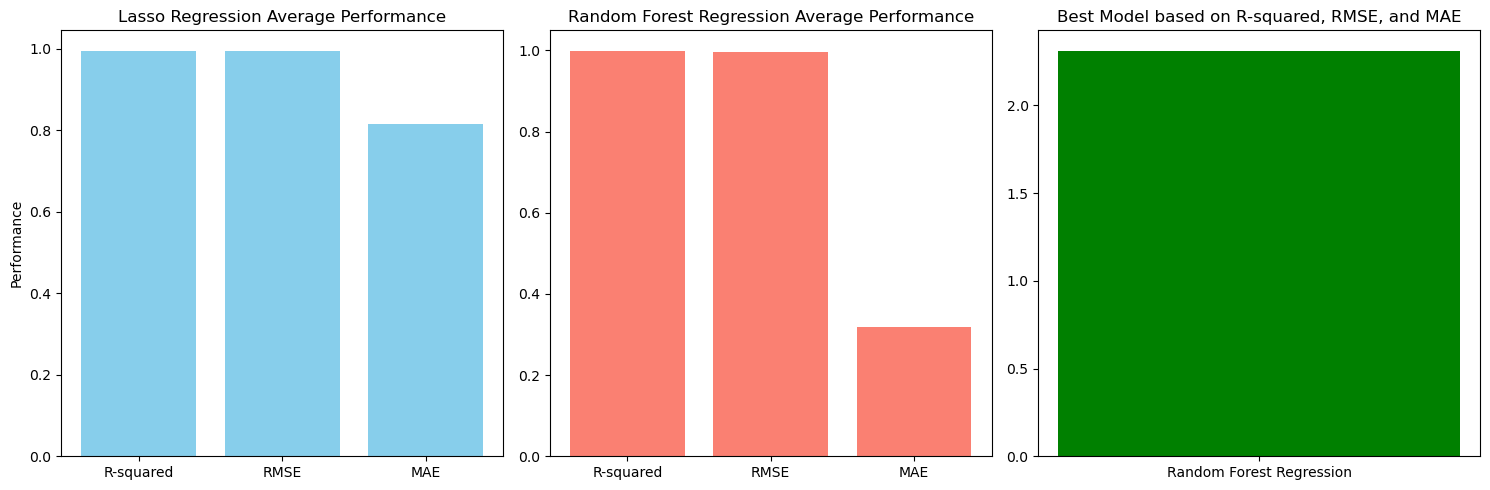

In [230]:
# Define performance metrics and their values
metrics = ['R-squared', 'RMSE', 'MAE']
lasso_performance = [avg_lasso_result[0], avg_lasso_result[1], avg_lasso_result[2]]
rf_performance = [avg_rf_result[0], avg_rf_result[1], avg_rf_result[2]]

# Create subplots for each performance metric
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Lasso Regression performance
axes[0].bar(metrics, lasso_performance, color='skyblue')
axes[0].set_title('Lasso Regression Average Performance')
axes[0].set_ylabel('Performance')

# Plot Random Forest Regression performance
axes[1].bar(metrics, rf_performance, color='salmon')
axes[1].set_title('Random Forest Regression Average Performance')

# Determine the best model based on all three metrics
lasso_score = sum(lasso_performance)
rf_score = sum(rf_performance)

best_model = "Lasso Regression" if lasso_score < rf_score else "Random Forest Regression"
axes[2].bar(best_model, min(lasso_score, rf_score), color=['green', 'red'])
axes[2].set_title('Best Model based on R-squared, RMSE, and MAE')

plt.tight_layout()
plt.show()


## Results Analysis

- Based on the results, the difference in R-squared and RMSE scores between the two models is not significant, so choosing MAE as the final criterion for model selection is reasonable. Since the MAE score of Random Forest Regression is lower, it is chosen as the best model in the end.
- A smaller MAE indicates that the model's predictions are closer to the actual values, meaning the model's predictions are more accurate. Therefore, for MAE, smaller values are better.

##  Implementation of Selected Model:

In [231]:
best_model = best_rf_model

# Visualize feature importances

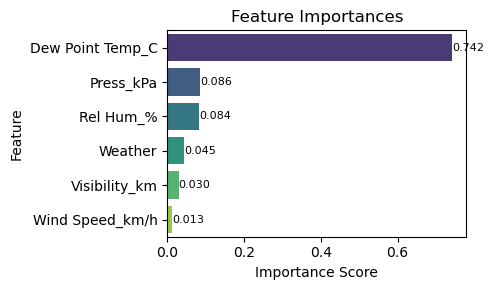

In [232]:
# Create a DataFrame to store feature importances from the random forest regressor
feat_imps = pd.DataFrame(best_model.feature_importances_, index=X_train.columns,
                         columns=['Importance Score']).sort_values('Importance Score', ascending=False)

# Reset index and rename columns
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature", "Importance Score"]

# # Plot a bar chart to visualize feature importances
# plt.figure(figsize=(5, 3))
# sns.barplot(x="Importance Score", y="Feature", data=feat_imps, orient="h")

# Plot a bar chart to visualize feature importances
plt.figure(figsize=(5, 3))
sns.barplot(x="Importance Score", y="Feature", data=feat_imps, orient="h", palette="viridis")

# Add feature importance values to the plot
for index, value in enumerate(feat_imps["Importance Score"]):
    plt.text(value, index, f"{value:.3f}", va='center', ha='left', fontsize=8)


plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# Remove low-correlation features

- I want to delete the features Weather and Visibility_km because they exhibit non-normal distributions and have low feature importances, indicating low correlation.
- By removing these features, we can simplify the model and improve its generalization ability.

In [233]:
# Delete features "Weather" and "Visibility_km"
X_train.drop(columns=['Weather', 'Visibility_km'], inplace=True)
X_test.drop(columns=['Weather', 'Visibility_km'], inplace=True)

# Re-train the model
best_model.fit(X_train, y_train)

# Evaluate model performance using the function
performance_str = evaluate_performance(best_model, X_train, y_train, X_test, y_test)

# Print the performance metrics
print(performance_str)

/var/folders/my/nmv4qk1x3cg_vs94jtv139v80000gp/T/ipykernel_49697/642765746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['Weather', 'Visibility_km'], inplace=True)
/var/folders/my/nmv4qk1x3cg_vs94jtv139v80000gp/T/ipykernel_49697/642765746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['Weather', 'Visibility_km'], inplace=True)


{'R-squared (Training Set)': 0.999803021065552, 'R-squared (Testing Set)': 0.9986091524449074, 'RMSE (Training Set)': 0.1643719923046894, 'RMSE (Testing Set)': 0.4321281033903871, 'MAE (Training Set)': 0.10466521505666394, 'MAE (Testing Set)': 0.25722702944240217}


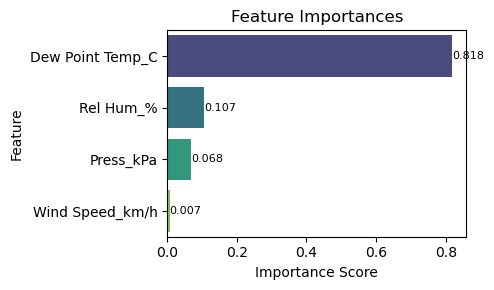

In [234]:
# Add code to visualize feature importances
# Create a DataFrame to store feature importances from the random forest regressor
feat_imps = pd.DataFrame(best_model.feature_importances_, index=X_train.columns,
                         columns=['Importance Score']).sort_values('Importance Score', ascending=False)

# Reset index and rename columns
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature", "Importance Score"]

# Plot a bar chart to visualize feature importances
# plt.figure(figsize=(5, 3))
# sns.barplot(x="Importance Score", y="Feature", data=feat_imps, orient="h")

# Plot a bar chart to visualize feature importances
plt.figure(figsize=(5, 3))
sns.barplot(x="Importance Score", y="Feature", data=feat_imps, orient="h", palette="viridis")

# Add feature importance values to the plot
for index, value in enumerate(feat_imps["Importance Score"]):
    plt.text(value, index, f"{value:.3f}", va='center', ha='left', fontsize=8)


plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Saving the trained model to a file to create an API.

In [235]:
import joblib

joblib.dump(best_model, 'trained_model.joblib')

['trained_model.joblib']

[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.9s
[CV] END ...max_depth=10, max_features=log2, n_estimators=50; total time=   0.4s
[CV] END ...max_depth=20, max_features=sqrt, n_estimators=50; total time=   0.7s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=100; total time=   1.5s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.5s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.8s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   0.8s
[CV] END ...max_depth=20, max_features=log2, n_estimators=50; total time=   0.7s
[CV] END ...max_depth=20, max_features=log2, n_estimators=50; total time=   0.8s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.5s
[CV] END ...max_depth=10, max_features=log2, n_estimators=50; total time=   0.5s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   0.8s
[CV] END ...max_depth=20, ma